In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils

Using TensorFlow backend.


In [65]:
train = pd.read_csv('train.csv')
labels = train.iloc[:,0].values.astype('int32')
X_train = (train.iloc[:,1:].values).astype('float32')
X_test = (pd.read_csv('test.csv').values).astype('float32')

# convert list of labels to binary class matrix
y_train = np_utils.to_categorical(labels) 


In [66]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau


In [67]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [68]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [7]:
random_seed = 2

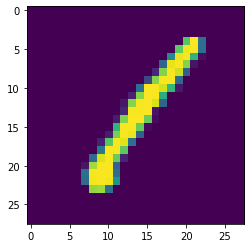

In [7]:
g = plt.imshow(X_train[0][:,:,0])

In [ ]:
model = Sequential()

model.add(Conv2D( 32, (3,3), activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Conv2D( 128, (3,3), activation ='relu'))
model.add(MaxPool2D(pool_size=(3,3)))





model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [ ]:
optimizer = RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
model.compile(optimizer='adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
epochs = 12
batch_size = 128

In [83]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.1)

In [85]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs,validation_data=(X_val,Y_val), verbose = 2,workers=3)

Train on 37800 samples, validate on 4200 samples
Epoch 1/12
 - 22s - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 2/12
 - 23s - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0026 - val_accuracy: 0.9995
Epoch 3/12
 - 23s - loss: 0.0044 - accuracy: 0.9984 - val_loss: 0.0026 - val_accuracy: 0.9988
Epoch 4/12
 - 23s - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.0012 - val_accuracy: 0.9995
Epoch 5/12
 - 23s - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.0075 - val_accuracy: 0.9976
Epoch 6/12
 - 23s - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.0024 - val_accuracy: 0.9988
Epoch 7/12
 - 23s - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0060 - val_accuracy: 0.9976
Epoch 8/12
 - 23s - loss: 0.0058 - accuracy: 0.9979 - val_loss: 0.0072 - val_accuracy: 0.9974
Epoch 9/12
 - 23s - loss: 0.0051 - accuracy: 0.9982 - val_loss: 0.0088 - val_accuracy: 0.9971
Epoch 10/12
 - 23s - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0096 - val_accuracy: 0.9969
Epoch 11/1

In [86]:
preds = model.predict_classes(X_test, verbose=0)
preds

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [87]:
pre=pd.DataFrame(preds)

In [88]:
pre=pre.reset_index()

In [89]:
pre=pre.rename(columns={'index': 'ImageId', 0: 'Label'})

In [90]:
pre['ImageId']+=1

In [91]:
pre


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [78]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 6, 128)         36992     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               295168    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)              

In [92]:
pre.to_csv("predic.csv",index=False)